## 使用决策树算法对电力窃漏电数据集建模

数据集最后一列为目标值    

按照序号1-6，完成要求

1. 数据划分 取30%做测试样本，剩下做训练样本



2. 使用CART决策树（分类树）进行建模



3. 生成混淆矩阵



4. 计算预测准确率



5. 进行交叉验证



6. 画出“受试者工作特征”曲线，即ROC曲线

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


### 1、数据划分 取30%做测试样本，剩下做训练样本

In [2]:
data = pd.read_excel('dataset.xls')
data

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [4]:
# train test split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### 2、使用CART决策树（分类树）进行建模

In [9]:
## decision tree classifier
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=1234)

In [10]:
## prediction on test set
y_pred = clf.predict(X_test)

### 3、生成混淆矩阵

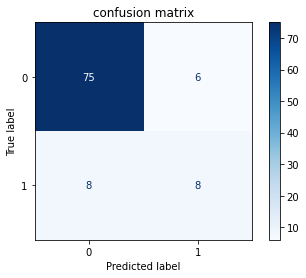

In [15]:
## confusion matrix

# ref. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = plot_confusion_matrix(clf, 
                             X_test, 
                             y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title('confusion matrix')

plt.show()

### 4、计算预测准确率

In [23]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'预测准确率：{acc:.4f}')

预测准确率：0.8557


### 5、进行交叉验证

In [36]:
cv_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)

print(f' 训练机集交叉验证准确率: {cv_score}')

 训练机集交叉验证准确率: [0.92307692 0.92307692 0.92307692 0.97435897 0.94736842]


### 6、画出“受试者工作特征”曲线，即ROC曲线

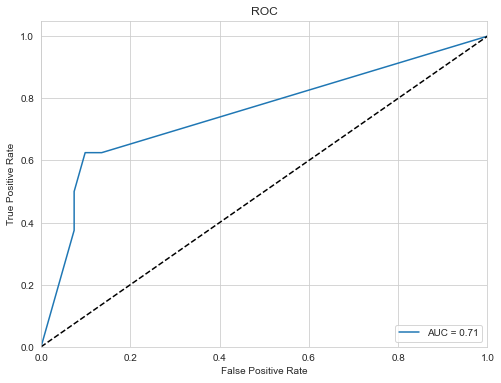

In [48]:
# ref. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
preds_probabilities = clf.predict_proba(X_test)
pred_probs = preds_probabilities[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, pred_probs)

# ROC
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()